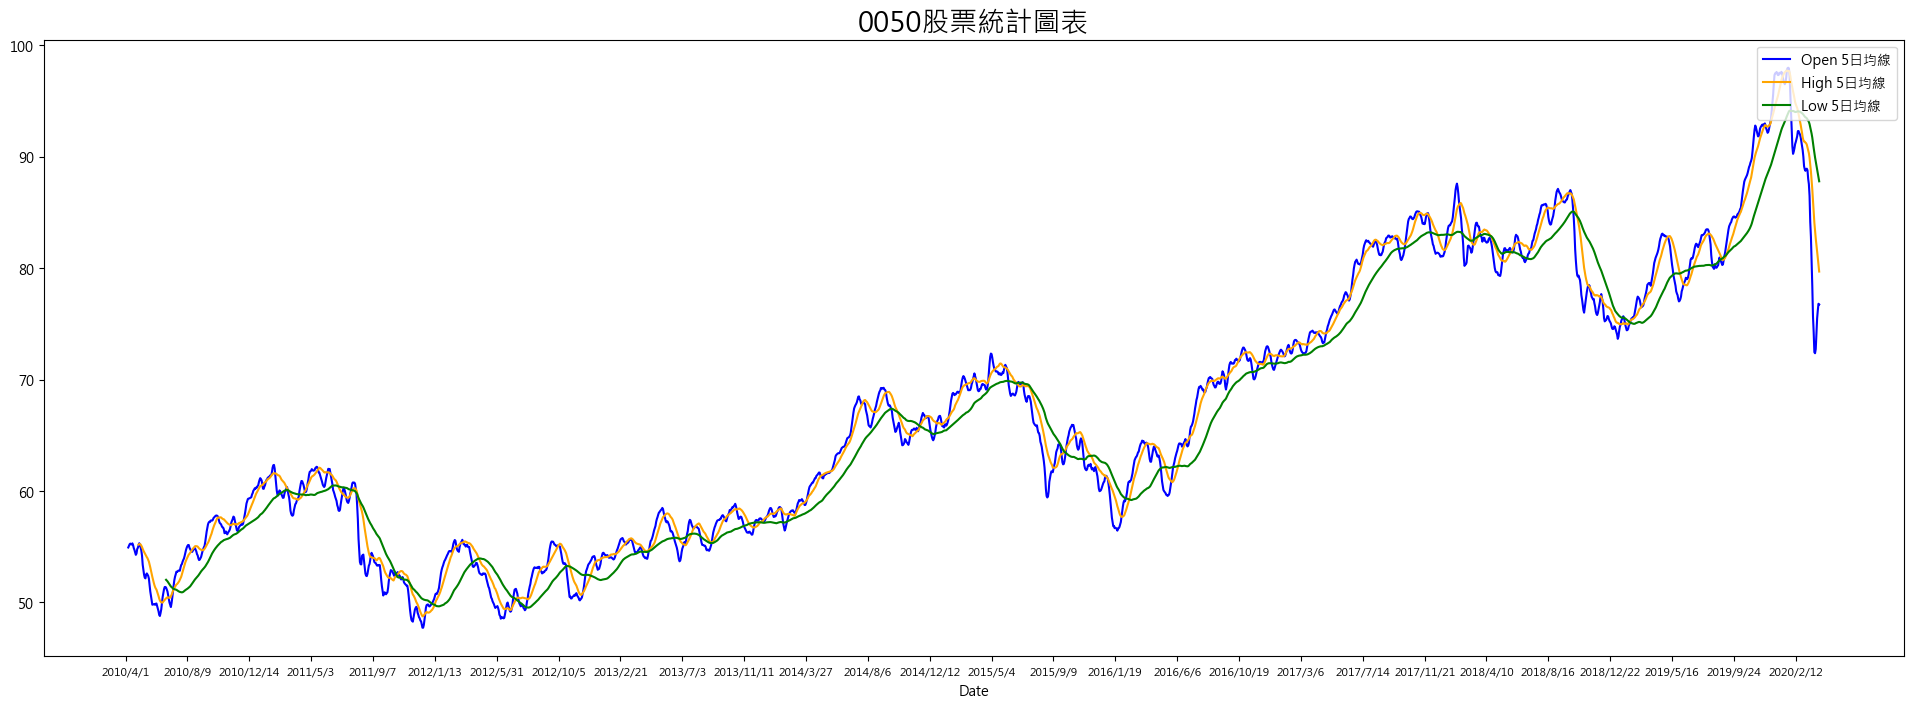

In [14]:
#problem 1
import pandas as pd
import talib
import matplotlib.pyplot as plt

fp = pd.read_csv("0050.csv") #read data

#read input
sma5 = input("請輸入要統計的欄位: (5-SMA) ")
while sma5 == "Amount":
    print("Expect for Amount,Try again")
    sma5 = input("請輸入要統計的欄位: (5-SMA) ")
sma20 = input("請輸入要統計的欄位: (20-SMA) ")
while sma20 == "Amount":
    print("Expect for Amount,Try again")
    sma20 = input("請輸入要統計的欄位: (5-SMA) ")
sma60 = input("請輸入要統計的欄位: (60-SMA) ")
while sma60 == "Amount":
    print("Expect for Amount,Try again")
    sma60 = input("請輸入要統計的欄位: (5-SMA) ")
    
print()

fp["5SMA"] = talib.SMA(fp[sma5].values, timeperiod=5) #拿值算5SMA，再放入5SMA的資料
fp["20SMA"] = talib.SMA(fp[sma20].values, timeperiod=20) #拿值算20SMA，再放入20SMA的資料
fp["60SMA"] = talib.SMA(fp[sma60].values, timeperiod=60) #拿值算60SMA，再放入60SMA的資料

# 定義圖表大小和標題
plt.figure(figsize=(24, 8)) #要先定義圖的大小
plt.title('0050股票統計圖表', fontsize=20)

# 繪製三條折線圖，每條折線圖都使用不同的顏色和標籤
plt.plot(fp["5SMA"], color='blue', label=sma5+' 5日均線') #提供y值
plt.plot(fp["20SMA"], color='orange', label=sma20+' 5日均線') #提供y值
plt.plot(fp["60SMA"], color='green', label=sma60+' 5日均線') #提供y值

# 設置X軸刻度和標籤
plt.xlabel('Date')   # 設定X軸標籤
xticks = range(0, len(fp["Date"]), 90) #設定步長為90
plt.xticks(xticks, fp['Date'][xticks], rotation=0, fontsize =8) #取出data值當作x軸

# 添加標籤圖例
plt.legend(loc='upper right')
 
# 顯示圖表
plt.show()

In [56]:
# problem 2
import pandas as pd
pd.set_option('display.unicode.east_asian_width', True)  # 設置列寬
pd.set_option('display.colheader_justify', 'center') # 將欄位對齊居中

fp = pd.read_csv("0056.csv", index_col="Date") #use index_col to change the index(把column的值放到index)
length = len(fp)

#將資料做z-score
OPEN = [ (fp["Open"][i]-fp["Open"].mean())/fp["Open"].std()  for i in range(length) ] 
HIGH = [ (fp["High"][i]-fp["High"].mean())/fp["High"].std()  for i in range(length) ]
LOW = [ (fp["Low"][i]-fp["Low"].mean())/fp["Low"].std()  for i in range(length) ]
CLOSE = [ (fp["Close"][i]-fp["Close"].mean())/fp["Close"].std()  for i in range(length) ]
AMOUNT = [ (fp["Amount"][i]-fp["Amount"].mean())/fp["Amount"].std()  for i in range(length) ]

#改值
fp["Open"] = OPEN
fp["High"] = HIGH
fp["Low"] = LOW
fp["Close"] = CLOSE
fp["Amount"] = AMOUNT

#create a dictionary
fp2 = { 
    "Open":[fp["Open"].mean() ,fp["Open"].std()] ,"High":[fp["High"].mean(), fp["High"].std()],
    "Low":[fp["Low"].mean() ,fp["Low"].std()],"Close":[fp["Close"].mean() ,fp["Close"].std()],
    "Amount":[fp["Amount"].mean() ,fp["Amount"].std()]
}

#根據dictionary 變為 Dataframe
Df = pd.DataFrame(fp2 , index = ["平均值" , "標準差"])
#merge two dataframe
result = pd.concat([fp,Df] , axis =0)

print(result)

               Open          High           Low          Close     \
2010/4/1  -9.671154e-01 -9.275652e-01 -9.251727e-01 -8.726066e-01   
2010/4/2  -9.088419e-01 -9.275652e-01 -8.566402e-01 -8.778961e-01   
2010/4/6  -8.611635e-01 -7.952761e-01 -8.144664e-01 -7.932647e-01   
2010/4/7  -7.975923e-01 -7.053195e-01 -7.301187e-01 -6.874755e-01   
2010/4/8  -6.916404e-01 -7.000279e-01 -7.143035e-01 -7.350806e-01   
...                 ...           ...           ...           ...   
2020/3/30 -3.472967e-01 -2.132039e-01 -3.716410e-01 -1.585293e-01   
2020/3/31 -1.884569e-02 -3.858227e-02 -6.588060e-02 -6.860850e-02   
2020/4/1  -7.182165e-02 -7.562323e-02 -5.006540e-02 -3.687173e-02   
平均值    -9.786301e-15  8.570522e-15 -5.269866e-15 -1.676643e-14   
標準差     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

              Amount     
2010/4/1  -3.510492e-01  
2010/4/2  -3.502761e-01  
2010/4/6  -3.241007e-01  
2010/4/7  -3.315005e-01  
2010/4/8  -3.447539e-01  
...                 .